In [1]:
import psycopg2
#from config import config
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = psycopg2.connect(
   database="live_database", user='postgres', password='1234', host='129.108.141.37', port= '5432'
)

In [3]:
cur = conn.cursor()

In [4]:
print(cur.execute("select version()"))

None


In [5]:
data = cur.fetchone()
print("Connection established to: ",data)

Connection established to:  ('PostgreSQL 14.1, compiled by Visual C++ build 1914, 64-bit',)


In [6]:
query = "SELECT subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4 FROM newbaselinereactiontimepsychometricfunctions;";
cur.execute(query)
reactionTimeResults = cur.fetchall()
#display(reactionTimeResults)
reactionTimeResults = pd.DataFrame(reactionTimeResults,columns = ["subjectid","date","x1","x2","x3","x4","y1","y2","y3","y4"])

query = "SELECT subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4 FROM newbaselinerewardchoicepsychometricfunctions;";
cur.execute(query)
rewardChoiceResults =cur.fetchall()
rewardChoiceResults = pd.DataFrame(rewardChoiceResults,columns = ["subjectid","date","x1","x2","x3","x4","y1","y2","y3","y4"])

query = "SELECT subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4 FROM newbaselinerotationpointspsychometricfunctions;";
cur.execute(query)
rotationPointsResults =cur.fetchall()
rotationPointsResults = pd.DataFrame(rotationPointsResults,columns = ["subjectid","date","x1","x2","x3","x4","y1","y2","y3","y4"])

query = "SELECT subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4 FROM newbaselinestoppingptspsychometricfunctions;";
cur.execute(query)
stoppingPointsResults = cur.fetchall()
stoppingPointsResults = pd.DataFrame(stoppingPointsResults,columns = ["subjectid","date","x1","x2","x3","x4","y1","y2","y3","y4"])

query = "SELECT subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4 FROM newbaselinetravelpixelpsychometricfunctions;";
cur.execute(query)
travelPixelResults =cur.fetchall()
travelPixelResults = pd.DataFrame(travelPixelResults,columns = ["subjectid","date","x1","x2","x3","x4","y1","y2","y3","y4"])

In [7]:
display(reactionTimeResults)
display(rewardChoiceResults)
display(rotationPointsResults)
display(stoppingPointsResults)
display(travelPixelResults)

,subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4
0,harley,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.0000000000000000,4.0000000000000000,2.9000000000000000,7.4666666666666700
1,shakira,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,8.4000000000000000,0.1000000000000000,2.6000000000000000,1.4333333333333300
2,raissa,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,8.4000000000000000,4.5000000000000000,2.4000000000000000,2.7666666666666700
3,renata,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,2.4000000000000000,2.7000000000000000,2.7750000000000000,1.7666666666666700
4,fiona,11/09/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.2000000000000000,6.3500000000000000,5.3500000000000000,3.5500000000000000
...,...,...,...,...,...,...,...,...,...,...
1693,buttercup,07/01/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,7.1500000000000000,2.4250000000000000,4.0250000000000000,1.8625000000000000
1694,fiona,07/07/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.1500000000000000,4.3800000000000000,2.2400000000000000,7.0300000000000000
1695,neftali,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.4272727272727300,2.0500000000000000,1.5900000000000000,3.9000000000000000
1696,fiona,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.4909090909090900,2.6500000000000000,4.6300000000000000,4.9300000000000000


,subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4
0,harley,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,0.5000000000000000,0E-16,0.7500000000000000,0.3333333333333330
1,shakira,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,0E-16,0E-16,0.5000000000000000,0.3333333333333330
2,raissa,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,0E-16,0E-16,0E-16,0E-16
3,renata,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,0E-16,0E-16,0.5000000000000000,0E-16
4,fiona,11/09/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,0.5000000000000000,0E-16,0E-16,1.0000000000000000
...,...,...,...,...,...,...,...,...,...,...
1645,buttercup,07/01/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,0.2500000000000000,0E-16,0.5000000000000000,0.2500000000000000
1646,fiona,07/07/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,0.7000000000000000,0.3000000000000000,0.2000000000000000,0.1000000000000000
1647,neftali,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,0.7272727272727270,0.9000000000000000,0E-16,0E-16
1648,fiona,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,0.8181818181818180,0.1000000000000000,0E-16,0.2000000000000000


,subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4
0,harley,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.5000000000000000,8.0000000000000000,12.5000000000000000,5.3333333333333300
1,shakira,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.5000000000000000,2.0000000000000000,8.0000000000000000,9.0000000000000000
2,raissa,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,16.5000000000000000,30.0000000000000000,8.2500000000000000,8.6666666666666700
3,renata,11/05/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.5000000000000000,0E-16,8.0000000000000000,17.0000000000000000
4,fiona,11/09/2021,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,3.5000000000000000,20.2500000000000000,3.0000000000000000,35.5000000000000000
...,...,...,...,...,...,...,...,...,...,...
1706,buttercup,07/01/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.1250000000000000,8.1250000000000000,3.3750000000000000,6.3750000000000000
1707,fiona,07/07/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,9.6000000000000000,3.5000000000000000,5.9000000000000000,5.1000000000000000
1708,neftali,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,5.2727272727272700,3.4000000000000000,3.0000000000000000,2.1000000000000000
1709,fiona,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,14.0000000000000000,4.3000000000000000,3.1000000000000000,6.5000000000000000


,subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4
0,harley,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,7.5000000000000000,7.0000000000000000,9.2500000000000000,6.3333333333333300
1,shakira,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,6.5000000000000000,9.0000000000000000,6.7500000000000000,7.0000000000000000
2,raissa,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,7.5000000000000000,8.0000000000000000,8.7500000000000000,8.0000000000000000
3,renata,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,8.0000000000000000,4.0000000000000000,8.5000000000000000,8.3333333333333300
4,fiona,11/09/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,11.5000000000000000,19.7500000000000000,11.5000000000000000,48.0000000000000000
...,...,...,...,...,...,...,...,...,...,...
1707,buttercup,07/01/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,1.5000000000000000,2.3750000000000000,1.5000000000000000,1.7500000000000000
1708,fiona,07/07/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,5.4000000000000000,4.1000000000000000,4.3000000000000000,4.1000000000000000
1709,neftali,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.9090909090909100,3.1000000000000000,5.0000000000000000,4.2000000000000000
1710,fiona,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,4.7272727272727300,5.0000000000000000,4.7000000000000000,4.3000000000000000


,subjectid,date,x1,x2,x3,x4,y1,y2,y3,y4
0,harley,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,79.0000000000000000,54.0000000000000000,112.0000000000000000,89.3333333333333000
1,shakira,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,61.5000000000000000,73.0000000000000000,105.0000000000000000,97.6666666666667000
2,raissa,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,102.5000000000000000,82.0000000000000000,129.7500000000000000,130.3333333333330000
3,renata,11/05/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,100.5000000000000000,45.0000000000000000,97.7500000000000000,66.0000000000000000
4,fiona,11/09/2021,0.0900000000000000,0.0600000000000000,0.0300000000000000,0.0100000000000000,167.0000000000000000,310.0000000000000000,129.0000000000000000,434.5000000000000000
...,...,...,...,...,...,...,...,...,...,...
1707,buttercup,07/01/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,7.0000000000000000,8.6250000000000000,6.0000000000000000,7.2500000000000000
1708,fiona,07/07/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,31.8000000000000000,61.5000000000000000,73.6000000000000000,66.1000000000000000
1709,neftali,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,41.2727272727273000,35.0000000000000000,52.3000000000000000,55.5000000000000000
1710,fiona,08/31/2022,0.0900000000000000,0.0500000000000000,0.0200000000000000,0.0050000000000000,39.2727272727273000,49.8000000000000000,54.8000000000000000,63.6000000000000000


In [8]:
def f(x,a,b,c,d):
    return a / (1+(b*(np.exp(-c *(x-d)))))
    #return a / (1. + np.exp(-c * (x - d))) + b
#'(a/(1+(b*(exp(-c*(x-d))))))'

In [9]:
x1 = 0.09
x2 = 0.05
x3 = 0.02
x4 = 0.005
y1 = reactionTimeResults.iloc[0,6]
y2 = reactionTimeResults.iloc[0,7]
y3 = reactionTimeResults.iloc[0,8]
y4 = reactionTimeResults.iloc[0,9]
display(y1)
display(y2)
display(y3)
display(y4)


Decimal('1.0000000000000000')

Decimal('4.0000000000000000')

Decimal('2.9000000000000000')

Decimal('7.4666666666666700')

C:\Users\ldd77\anaconda3\envs\machineLearning\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.951606106519076
-0.11679530428069054
33.657215426011525
0.05972519890177606


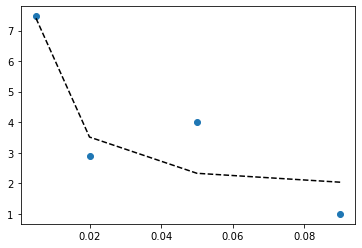

In [10]:
x = np.array([x1,x2,x3,x4])
y = np.array([y1,y2,y3,y4])
(a_,b_,c_,d_),_ = opt.curve_fit(f,x,y,maxfev = 10000)

y_fit = f(x,a_,b_,c_,d_)
fig,ax = plt.subplots(1,1,figsize = (6,4))
ax.plot(x,y,'o')
ax.plot(x,y_fit,'--k')
print(a_)
print(b_)
print(c_)
print(d_)

In [11]:
optimizedParameters = []
display(reactionTimeResults.shape)
couldntFindCounter = 0
for i in range(reactionTimeResults.shape[0]):
    try:
        x = np.array([0.09,0.05,0.02,0.005])
        y = np.array([reactionTimeResults.iloc[i,6],
              reactionTimeResults.iloc[i,7],
              reactionTimeResults.iloc[i,8],
              reactionTimeResults.iloc[i,9]])
        (a_,b_,c_,d_),covariance = opt.curve_fit(f,x,y,maxfev = 500000)
        y_fit = f(x,a_,b_,c_,d_)
        SE = np.sqrt(np.diag(covariance))
        SE_A = SE[0]
        SE_B = SE[1]
        SE_C = SE[2]
        SE_D = SE[3]
        #if SE_A < 1 or SE_B < 1 or SE_C < 1 or SE_D < 1:
        optimizedParameters.append([a_,b_,c_,d_])
    except:
        couldntFindCounter+=1
print("Couldn't find this many: ", couldntFindCounter) 

(1698, 10)

C:\Users\ldd77\anaconda3\envs\machineLearning\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Couldn't find this many:  3


In [12]:
optimizedParametersDF = pd.DataFrame(optimizedParameters,columns =["A","B","C","D"])
display(optimizedParametersDF)

,A,B,C,D
0,1.951606,-0.116795,33.657215,0.059725
1,1.377773,-0.134897,-294.574161,0.083808
2,0.003527,-0.967701,-0.010993,-2.858621
3,0.010294,-0.933242,-0.006189,-10.429063
4,0.003073,-0.985310,0.003567,3.977235
...,...,...,...,...
1690,2.770828,-0.001676,-290.381988,0.069677
1691,2.589999,-0.109044,879.192633,0.006998
1692,1.689090,-0.001272,865.013732,0.012051
1693,3.425227,-0.189746,-3.577901,7.098067


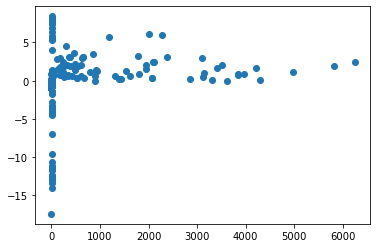

In [14]:
fig,ax = plt.subplots(1,1,figsize = (6,4))
#df.Courses.values.tolist()
ax.plot((optimizedParametersDF.A.values.tolist()),
        (optimizedParametersDF.B.values.tolist()),
        'o')